<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/Unidad_3/3_Busqueda_binaria_y_mas_alla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Búsqueda binaria

La búsqueda binaria es un constructo muy útil que sirve para mejorar el tiempo de ejecución de muchos algoritmos que operan sobre listas.

## Intuición

Imaginemos que tenemos una lista ordenada, y queremos determinar si contiene a un elemento $x$. Podríamos (ingenuamente) recorrer toda la lista y compara elemento por elemento; sin embargo, como la lista está ordenada, y asumiendo que estamos parados en un índice $i$, podemos notar lo siguiente:

* Si $L_i < x$, entonces tenemos que checar solo los elementos a la derecha de $L_i$ (i.e., aquellos con un índice mayor a $i$), ya que sabemos que todos los elementos a la izquierda también serán menores que $x$.
* Por el mismo razonamiento, si $x<L_i$, solo tenemos que checar los elementos a la izquierda.
* Finalmente, si $x=L_i$, habremos terminado.

Implementamos esto en la siguiente celda:

In [8]:
def b_search(L, x):
    l = 0
    r = len(L) - 1
    while l <= r:
        m = (l+r)//2
        if L[m] == x:
            return m
        elif L[m] > x:
            r = m-1
        elif L[m] < x:
            l = m+1
    return

Tomando una lista de ejemplo:

In [9]:
x = 0
L = list(sorted(np.random.randint(-10, 10, 20)))
print(L)

idx = b_search(L, x)
print(f"El {x} se encuentra en el índice {idx}")

[-10, -9, -8, -7, -6, -5, -4, -2, 0, 0, 1, 2, 3, 3, 6, 6, 7, 7, 7, 7]
El 0 se encuentra en el índice 9


## Extensión

Este método puede extenderse a toda clase de problemas que impliquen buscar sobre una lista hasta que uno de sus elementos cumpla una cierta condición. Para evitar estar reescribiendo la función anterior cada vez que queramos cambiarla, la generalizamos de la siguiente manera:

In [4]:
def binary_search(L, det):
    l = 0
    r = len(L) - 1
    while l <= r:
        m = (l+r)//2
        res = det(L, m)
        if res == 0:
            return m
        elif res > 0:
            r = m-1
        elif res < 0:
            l = m+1
    return

Nótese que cambiamos el argumento `x` por `det`. Esta es una función de dos argumentos que en cada iteración evaluamos sobre `(L, m)`, y consideramos su resultado de la siguiente forma:

* Si `det(L, m) < 0`, tomamos la sublista de la izquierda.
* Si `det(L, m) > 0`, tomamos la sublista de la derecha.
* Si `det(L, m) = 0`, regresamos.

Entonces, nuestro problema de búsqueda binaria original puede reescribirse con la función:

$$
det(L, m) = L[m] - x
$$

In [10]:
det = lambda L, m: L[m] - 0
idx = binary_search(L, det)
print(f"El {x} se encuentra en el índice {idx}")

El 0 se encuentra en el índice 9


# Ejemplos

## Puntos fijos

Consideremos una lista $L$ de números enteros en orden estrictamente creciente. Nuestro objetivo será determinar si existen o no puntos fijos, es decir, si existen elementos tales que $i = L[i]$.

Podemos utilizar búsqueda binaria para este problema, ya que si estamos parados en un índice $i$, tenemos tres posibilidades:

*   $i = L[i]$, en cuyo caso hemos terminado.
*   $i < L[i]$, dado que $L$ tiene puros enteros, y están en orden creciente, se tiene que para cualquier $j > i$, $j < L[j]$, por lo que nos queda restringirnos a los índices menores que $i$.
*   $i > L[i]$ de manera análoga al caso anterior se tiene que podemos restringir nuestra búsqueda a los índices mayores que $i$.

Entonces, nuestra función determinante es simplemente:

$$
det(L, m) = L_m - m
$$

In [12]:
L = [-4, -1, 0, 1, 4, 6, 8]
det = lambda L, m: L[m] - m
idx = binary_search(L, det)
print(f"El punto fijo está en el lugar {idx}")

El punto fijo está en el lugar 4


## Raíz cuadrada

Hasta ahora hemos visto ejemplos de búsqueda binaria en casos discretos, ¿se puede hacer búsqueda binaria en casos no discretos? Un ejemplo de esto es que podemos encontrar el valor de $\sqrt{x}$ usando estas ideas, ya que se cumplen las propiedades para poder hacer este tipo de búsqueda:

*   Si $a^2 < x$, entonces podemos restringir nuestra búsqueda a números mayores que $a$.
*   Si $a^2 > x$, podemos restringir la búsqueda a números menores que $a$.
*   Si $a^2 = x$, hemos terminado.

Antes de proceder a la implementación, debemos cosiderar dos cosas: La primera es que no podemos ser tan optimistas de encontrar el valor exacto de $\sqrt{x}$, por lo que debemos definir un margen de error. La segunda es que primero debemos deifnir nuestro intervalo de búsqueda: para $x>1$ tomaremos el rango $[1,x]$, mientras que para $x\leq 1$, tomaremos el intervalo $[0,1]$.

In [13]:
def sqrt(x, e=1e-6):
    if x < 0:
        raise Exception("El número no tiene raíz cuadrada en los reales")
    elif x >= 1:
        l, r = 1, x
    else:
        l, r = 0, 1
        
    while l < r:
        m = (l+r)/2
        aux = m*m
        if abs(aux - x) < e:
            return m
        elif aux > x:
            r = m
        elif aux < x:
            l = m
    return (l+r)/2

print(sqrt(144))

12.000000010244548


## Picos

Aupongamos ahora que tenemos una lista (con al menos tres elementos) en forma de pico, es decir, que existe un elemento tal que todos los elementos antes de él estan en orden creciente, y todos los elementos posteriores están en orden decreciente. ¿Cómo encontrar el elemento más grande de $L$?

Notemos que el elemento más grande es justamente el que está en el pico, y para encontrarlo podemos usar búsqueda binaria, considerando las siguientes observaciones. Si estamos parados en el $i-$ésimo elemento, se tienen tres casos:

*   $L[i-1] < L[i] < L[i+1]$, en este caso, sabemos que el 'pico' se encuentra a la derecha de $i$.
*   $L[i-1] > L[i] > L[i+1]$, en este caso, sabemos que el 'pico' se encuentra a la izquierda de $i$.
*   $L[i-1] < L[i]$ y $L[i] > L[i+1]$, en este caso hemos encontrado el 'pico' de la lista, pues es el único elemento que cumple ambas desigualdades.

Veamos la implementación de este algoritmo. Notemos que debemos tener cuidado con que $i$ sea algún valor de los extremos de la lista.



In [14]:
def peak(L):
    l = 0
    r = len(L) - 1
    while l <= r:
        m = (l+r)//2
        if m == 0:
            if L[0] < L[1] :
                return 1
            else:
                return 0
        elif m == len(L) - 1:
            if(L[m] > L[m-1]):
                return m
            else:
                return m-1
        else:
            if L[m-1] < L[m]:
                if(L[m] < L[m+1]):
                    l = m+1
                else:
                    return m
            else:
                r = m-1
    return l

Lista = [1, 2, 3, 4, 5, 6, 4, 2, 0]
idx = peak(Lista)
print('El pico está en la posición', idx, 'y es', Lista[idx])

El pico está en la posición 5 y es 6


Notemos que lo pudimos haber resuelto con un tipo de 'counting sort', conservando en cada momento el mayor valor que hemos visto al recorrer la lista, sin embargo hacer esto tiene complejidad $O(n)$ en tiempo, mientras que con la búsqueda binaria se reduce a $O(log \; n)$.

En el espíritu del ejemplo anterior, ¿podemos pasar de este algoritmo a un ejemplo que no sea discreto? Es decir, supongamos que se tiene una función $f : [a,b] \rightarrow \mathbb{R}$ tal que existe $c \in [a,b]$ que cumple que para cualesquiera $x < y \in [a,c]$ se tiene $f(x) < f(y)$ mientras que para cualesquiera $x < y \in [c, b]$ se tiene que $f(x) > f(y)$. ¿Podemos encontrar el valor de $c$ con búsqueda binaria?

Después de analizar este problema un rato, podemos notar que la búsqueda binaria nos permite únicamente investigar por un elemento a la vez, lo que no es suficiente en nuestro caso, ¿qué pasa si en lugar de investigar por un único elemento, investigamos por dos? Es decir, en lugar de analizar el elemento de enmedio y con esto tomar una decisión, analizaremos los elementos que surgen de partir el intervalo en tres, y esto nos permitirá eliminar una de las terceras partes en las que se partió el intervalo.

Para poder hacer todo esto, sean $m_1, m_2$ los puntos que dividen al intervalo $[l,r]$ en tres, hagamos algunas observaciones:

*   Si $f(m_1) < f(m_2)$, se tiene que podemos descartar el intervalo $[l, m_1]$.
*   Si $f(m_1) > f(m_2)$, se tiene que podemos descartar el intervalo $[m_2, r]$
*   Si $f(m_1) = f(m_2)$, podemos descartar tanto el intervalo $[l, m_1]$ como $[m_2, r]$, ya que sabemos que el mayor estará enmedio.

Veamos una implementación de este algoritmo. Encontraremos el máximo de la función $x^3 + 3x^2$ en el intervalo $[-3,0]$. Al igual que en el ejemplo anterior, tenemos que definir un intervalo de error, para definir la precisión de nuestro resultado.



In [15]:
import matplotlib.pyplot as plt

In [16]:
def peakC(f, l, r, e=1e-6):
    while r - l >= e:
        m1 = l + (r-l)/3
        m2 = r - (r-l)/3
        f1 = f(m1)
        f2 = f(m2)
        if f1 < f2:
            l = m1
        elif f1 > f2:
            r = m2
        elif f1 == f2:
            l = m1
            r = m2
    return (r+l)/2

f = lambda x: x**3 + 3 * x**2
peakC(f, -3,0)

-2.000000042236351

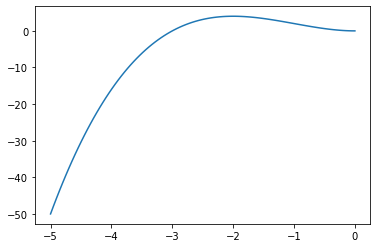

In [17]:
x = np.linspace(-5, 0, 100)
y = f(x)
plt.plot(x, y)

## Sublista con suma máxima

Dada una lista $L$ de números reales, encontrar la mayor suma posible de una sublista no vacía (con elementos contiguos).

El problema se puede resolver de forma sencilla iterando sobre los posibles extremos de la lista, sin embargo, esto nos da una complejidad de al menos $O(n^2)$, ¿se puede mejorar?

Consideremos dividir el problema de la siguiente forma: 

*   Sea $m$ la mitad de la longitud de la lista (que es $n$).
*   Resolvemos el problema para la lista formada por $[L_0, L_1, \ldots, L_{m-1}]$.
*   Resolvemos el problema para la lista formada por $[L_{m+1}, L_{m+2}, \ldots, L_n]$.
*   Encontramos la lista de mayor suma que contiene al elemento $L_m$ (lo cual se puede hacer en $O(n)$). Basta con encontrar la mayor suma por la derecha y la mayor suma por la izquierda para listas que contengan a $L_m$.
*   Devolvemos el mayor valor encontrado.

Podemos notar que este algoritmo tiene una complejidad de $O(n \; log n)$. Veamos su implementación.

In [18]:
def max_sum(L, l=None, r=None):
    if l is None:
        l = 0
    if r is None:
        r = len(L) - 1
        
    if l == r:
        return L[l]
    elif l == r - 1:
        return max(L[l], L[r], L[r]+L[l])
    
    m = (l+r)//2
    m1 = max_sum(L, l, m-1)
    m2 = max_sum(L, m+1, r)
    sum_r = L[m]
    sum_l = L[m]
    max_r = L[m]
    max_l = L[m]
    idx = m+1
    while idx <= r:
        sum_r += L[idx]
        if sum_r > max_r:
            max_r = sum_r
        idx += 1
    idx = m-1
    while idx >= l:
        sum_l += L[idx]
        if sum_l > max_l:
            max_l = sum_l
        idx -= 1
    Mmax = max_r + max_l - L[m]
    return max(Mmax, m1, m2)

L = [-2, -5, 6, -2, -3, 1, 5, -6]
max_sum(L)

7

**Ejercicios**


1.  Dada una lista de números reales $L$, describe e implementa un algoritmo con complejidad en tiempo menor a $O(n^2)$ que cuente el número de inversiones en la lista, es decir, que cuente cuántas parejas $(i,j)$ cumplen que $i < j$ pero $L[i] > L[j]$. (Hint: Merge sort). Muestra un ejemplo en una lista de tu elección.
2.   Usando búsqueda ternaria, encuentra el menor valor de $x^3 - 4x^2$ en el intervalo $[0,4]$.



*Ejercicio 1.* Como hint, recuerda cómo funciona merge sort. Cuenta las inversiones en la primera mitad y en la segund mitad de la lista. Resta contar cuántas inversiones tienen un elemento en cada mitad, estas se pueden ir contando en el proceso de unión de las listas que se hace en el algoritmo de merge sort.

(Aquí va la descripción de tu algoritmo)

In [ ]:
# Aquí va el código del algoritmo que describiste anteriormente

*Ejercicio 2.* Escribe a continuación el código correspondiente.

In [ ]:
# Aquí va el código para la búsqueda ternaria solicitada